In [10]:
import json

secrets_filename = 'key.txt'
api_keys = {}
with open(secrets_filename, 'r') as f:
    api_keys = json.loads(f.read())

#print(api_keys['TWITTER_SECRET'])

               Open      High      Low    Close      Volume
2004-08-19  100.010  104.0600   95.960  100.335  44659000.0
2004-08-20  101.010  109.0800  100.500  108.310  22834300.0
2004-08-23  110.760  113.4800  109.050  109.400  18256100.0
2004-08-24  111.240  111.6000  103.570  104.870  15247300.0
2004-08-25  104.760  108.0000  103.880  106.000   9188600.0
...             ...       ...      ...      ...         ...
2024-12-30  189.800  192.5500  189.120  191.240  14264659.0
2024-12-31  191.075  191.9600  188.510  189.300  17466919.0
2025-01-02  190.650  192.0000  187.500  189.430  20370828.0
2025-01-03  191.370  193.2100  189.975  191.790  18596159.0
2025-01-06  193.980  198.2222  193.850  196.870  29563638.0

[5130 rows x 5 columns]


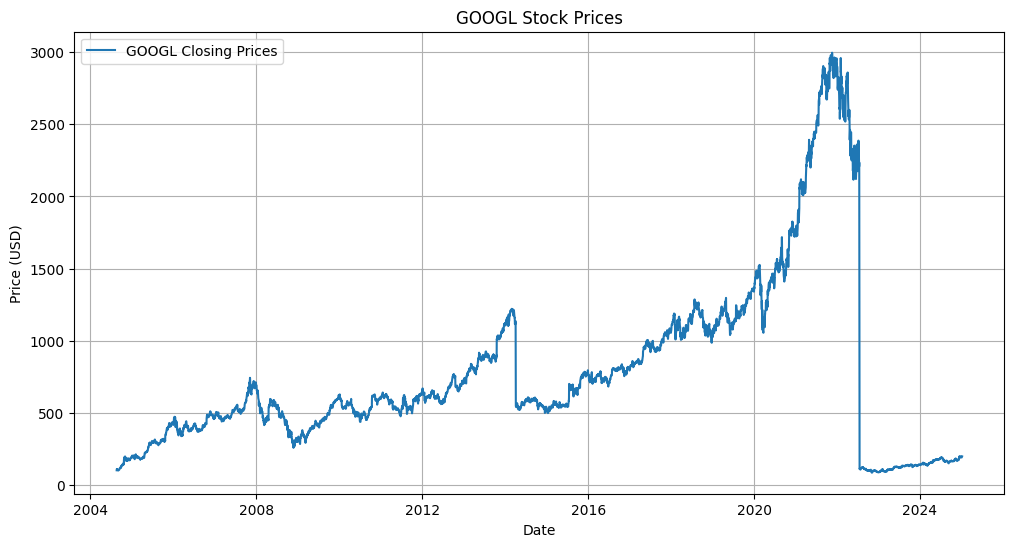

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to fetch data
def fetch_stock_data(symbol, interval='daily', apikey= None):
    base_url = "https://www.alphavantage.co/query?"
    if not api_key:
        raise ValueError("API key is required.")
    elif interval == 'daily':
        function = "TIME_SERIES_DAILY"
    elif interval == 'intraday':
        function = "TIME_SERIES_INTRADAY"
    else:
        raise ValueError("Unsupported interval. Use 'daily' or 'intraday'.")
    
    params = {
        "function": function,
        "symbol": symbol,
        "apikey": api_key,
        "datatype": "json",
        "outputsize": "full"  # 'compact' for last 100 data points; 'full' for entire dataset
    }
    
    if interval == 'daily':
        params["interval"] = "15min"  # Options: 1min, 5min, 15min, 30min, 60min
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Parse the JSON response
    if "Time Series (Daily)" in data:
        timeseries = data["Time Series (Daily)"]
    elif "Time Series (60min)" in data:
        timeseries = data[f"Time Series (60min)"]
    elif "Time Series (30min)" in data:
        timeseries = data[f"Time Series (30min)"]
    elif "Time Series (15min)" in data:
        timeseries = data[f"Time Series (15min)"]
    else:
        raise ValueError("Unexpected API response. Check your API call or symbol.")
    
    # Convert to DataFrame
    df = pd.DataFrame.from_dict(timeseries, orient="index", dtype="float")
    df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume"
    }, inplace=True)
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    return df

# Fetch data 
api_key = "key.txt"
symbol = "GOOGL"
data = fetch_stock_data(symbol)

# Display the data
print(data)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{symbol} Closing Prices')
plt.title(f'{symbol} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


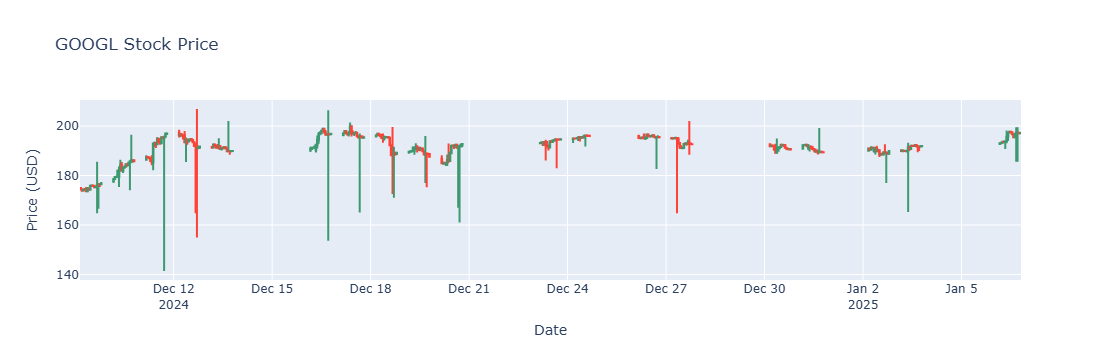

In [8]:
import plotly.graph_objects as go

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])
fig.update_layout(
    title=f'{symbol} Stock Price',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)
fig.show()




In [15]:
#response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=key.txt")
#print(response.json()) # for testing the API get function